<a href="https://colab.research.google.com/github/AmlanSamanta/Predictive-Maintenance-using-ML-and-Python/blob/main/Predictive_Maintenance_for_Nasa_Turbofan_Jet_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/ml-olympiad-predictive-maintenance/train_set.csv")
test = pd.read_csv("/content/drive/MyDrive/ml-olympiad-predictive-maintenance/test_set.csv")
submission = pd.read_csv("/content/drive/MyDrive/ml-olympiad-predictive-maintenance/sampled_submission.csv")

In [ ]:
pd.set_option('display.max_columns', None)
train

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,RUL
0,1,1,42.0049,0.8400,100,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320
1,1,2,20.0020,0.7002,100,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319
2,1,3,42.0038,0.8409,100,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318
3,1,4,42.0000,0.8400,100,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317
4,1,5,25.0063,0.6207,60,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100,489.05,605.33,1516.36,1315.28,10.52,15.46,404.59,2319.66,8840.16,1.27,46.08,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,4
61245,249,252,0.0028,0.0015,100,518.67,643.42,1598.92,1426.77,14.62,21.57,567.59,2388.47,9117.12,1.31,48.04,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,3
61246,249,253,0.0029,0.0000,100,518.67,643.68,1607.72,1430.56,14.62,21.57,569.04,2388.51,9126.53,1.31,48.24,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,2
61247,249,254,35.0046,0.8400,100,449.44,555.77,1381.29,1148.18,5.48,7.96,199.93,2223.78,8403.64,1.05,42.53,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   unit_nr                                61249 non-null  int64  
 1   time_cycles                            61249 non-null  int64  
 2   setting_1                              61249 non-null  float64
 3   setting_2                              61249 non-null  float64
 4   setting_3                              61249 non-null  int64  
 5   Fan inlet temperature (◦R)             61249 non-null  float64
 6   LPC outlet temperature (◦R)            61249 non-null  float64
 7   HPC outlet temperature (◦R)            61249 non-null  float64
 8   LPT outlet temperature (◦R)            61249 non-null  float64
 9   Fan inlet Pressure (psia)              61249 non-null  float64
 10  bypass-duct pressure (psia)            61249 non-null  float64
 11  HP

In [ ]:
train.describe()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,RUL
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,124.325181,134.311417,23.999823,0.571347,94.031576,472.882435,579.420056,1417.896600,1201.915359,8.031626,11.589457,283.328633,2228.686034,8524.673301,1.096445,42.874529,266.735665,2334.427590,8067.811812,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995,133.311417
std,71.995350,89.783389,14.780722,0.310703,14.251954,26.436832,37.342647,106.167598,119.327591,3.622872,5.444017,146.880210,145.348243,336.927547,0.127681,3.243492,138.479109,128.197859,85.670543,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697,89.783389
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.480000,1242.670000,1024.420000,3.910000,5.670000,136.170000,1914.720000,7984.510000,0.930000,36.040000,128.310000,2027.570000,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300,0.000000
25%,60.000000,62.000000,10.004600,0.250700,100.000000,445.000000,549.330000,1350.550000,1119.490000,3.910000,5.720000,142.920000,2211.950000,8320.590000,1.020000,41.760000,134.520000,2387.910000,8062.630000,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100,61.000000
50%,126.000000,123.000000,25.001400,0.700000,100.000000,462.540000,555.740000,1367.680000,1136.920000,7.050000,9.030000,194.960000,2223.070000,8362.760000,1.030000,42.330000,183.450000,2388.060000,8083.810000,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100,122.000000
75%,185.000000,191.000000,41.998100,0.840000,100.000000,491.190000,607.070000,1497.420000,1302.620000,10.520000,15.480000,394.280000,2323.930000,8777.250000,1.260000,45.220000,371.400000,2388.170000,8128.350000,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500,190.000000
max,249.000000,543.000000,42.008000,0.842000,100.000000,518.670000,644.420000,1613.000000,1440.770000,14.620000,21.610000,570.810000,2388.640000,9196.810000,1.320000,48.360000,537.490000,2390.490000,8261.650000,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200,542.000000


In [ ]:
for var in train:
  print(var, train[var].nunique())
  print(train[var].unique())

unit_nr 249
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [ ]:
for var in train:
  print(var,train[var].nunique())

unit_nr 249
time_cycles 543
setting_1 536
setting_2 105
setting_3 2
Fan inlet temperature (◦R) 6
LPC outlet temperature (◦R) 1704
HPC outlet temperature (◦R) 13558
LPT outlet temperature (◦R) 17353
Fan inlet Pressure (psia) 6
bypass-duct pressure (psia) 46
HPC outlet pressure (psia) 5926
Physical fan speed (rpm) 1038
Physical core speed (rpm) 25297
Engine pressure ratio (P50/P2) 21
HPC outlet Static pressure (psia) 737
Ratio of fuel flow to Ps30 (pps/psia) 5627
Corrected fan speed (rpm) 483
Corrected core speed (rpm) 15938
Bypass Ratio 11915
Burner fuel-air ratio 2
Bleed Enthalpy 54
Required fan speed 6
Required fan conversion speed 2
High-pressure turbines Cool air flow 652
Low-pressure turbines Cool air flow 21574
RUL 543


In [ ]:
train.isnull().sum()

unit_nr                                  0
time_cycles                              0
setting_1                                0
setting_2                                0
setting_3                                0
Fan inlet temperature (◦R)               0
LPC outlet temperature (◦R)              0
HPC outlet temperature (◦R)              0
LPT outlet temperature (◦R)              0
Fan inlet Pressure (psia)                0
bypass-duct pressure (psia)              0
HPC outlet pressure (psia)               0
Physical fan speed (rpm)                 0
Physical core speed (rpm)                0
Engine pressure ratio (P50/P2)           0
HPC outlet Static pressure (psia)        0
Ratio of fuel flow to Ps30 (pps/psia)    0
Corrected fan speed (rpm)                0
Corrected core speed (rpm)               0
Bypass Ratio                             0
Burner fuel-air ratio                    0
Bleed Enthalpy                           0
Required fan speed                       0
Required fa

In [ ]:
train[train['unit_nr']==249]

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,RUL
60994,249,1,41.9993,0.8409,100,445.00,548.68,1343.85,1111.03,3.91,5.69,137.26,2211.96,8296.96,1.01,41.69,129.46,2387.97,8068.65,9.3383,0.02,328,2212,100.0,10.48,6.3841,254
60995,249,2,42.0073,0.8400,100,445.00,548.50,1343.11,1108.02,3.91,5.69,138.40,2211.93,8304.82,1.01,41.56,129.91,2387.98,8075.72,9.3616,0.02,330,2212,100.0,10.58,6.3506,253
60996,249,3,20.0058,0.7000,100,491.19,607.22,1478.88,1244.42,9.35,13.60,332.86,2323.66,8709.26,1.07,43.99,312.69,2387.85,8053.84,9.1826,0.02,363,2324,100.0,24.59,14.6880,252
60997,249,4,10.0039,0.2500,100,489.05,604.10,1488.19,1297.50,10.52,15.46,393.88,2318.63,8773.14,1.26,44.95,370.86,2387.83,8124.24,8.6464,0.03,367,2319,100.0,28.80,17.0438,251
60998,249,5,9.9990,0.2500,100,489.05,604.46,1490.03,1294.91,10.52,15.46,393.25,2318.65,8766.53,1.25,44.90,370.42,2387.86,8123.00,8.6340,0.03,368,2319,100.0,28.69,17.1511,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100,489.05,605.33,1516.36,1315.28,10.52,15.46,404.59,2319.66,8840.16,1.27,46.08,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,4
61245,249,252,0.0028,0.0015,100,518.67,643.42,1598.92,1426.77,14.62,21.57,567.59,2388.47,9117.12,1.31,48.04,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,3
61246,249,253,0.0029,0.0000,100,518.67,643.68,1607.72,1430.56,14.62,21.57,569.04,2388.51,9126.53,1.31,48.24,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,2
61247,249,254,35.0046,0.8400,100,449.44,555.77,1381.29,1148.18,5.48,7.96,199.93,2223.78,8403.64,1.05,42.53,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,1


In [ ]:
rcrdCnts_per_engineUnit_train=pd.DataFrame(train['unit_nr'].value_counts())
rcrdCnts_per_engineUnit_train.sort_index(inplace=True)
rcrdCnts_per_engineUnit_train

,unit_nr
1,321
2,299
3,307
4,274
5,193
...,...
245,205
246,161
247,211
248,184


In [ ]:
test

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow
0,0,1,38.4734,0.5713,100,472.8824,549.0672,1515.4699,1170.7242,12.9053,12.4615,283.3286,2228.6860,8396.0729,1.0964,41.9139,266.7357,2362.8872,8067.8118,9.4777,0.0239,348,2246,98.5813,14.6900,12.5190
1,0,2,31.8898,0.3428,100,480.6683,558.7492,1386.6294,1201.9154,6.8373,9.9322,433.3918,2302.2723,8251.2264,1.1596,43.5590,247.2863,2262.5543,8067.8118,9.3246,0.0208,348,2234,99.0192,15.7099,11.4781
2,0,3,34.6499,0.5713,100,493.0275,567.7337,1398.5125,1182.3209,10.2091,12.9014,283.3286,2228.6860,8735.4427,1.0964,42.7221,375.4411,2334.4276,8067.8118,9.7454,0.0233,353,2222,94.7672,13.3141,7.1755
3,0,4,30.0495,0.5713,100,471.7574,579.4201,1440.5407,1188.1000,6.0063,11.5895,251.6736,2185.7108,8261.1138,1.0841,44.5066,273.6169,2352.6543,8067.8118,9.5954,0.0206,341,2336,102.9926,21.6907,9.6127
4,0,5,31.8812,0.4365,100,473.7411,574.1691,1377.9721,1286.4247,5.7570,9.3094,395.8006,2228.6860,8634.5535,0.9887,40.8614,283.7432,2367.4422,8067.8118,8.9220,0.0254,340,2229,97.6193,23.2685,11.4009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54948,350,504,19.4348,0.4936,100,487.8005,558.5404,1400.1744,1192.1876,9.2901,11.5895,449.1933,2302.3213,8472.8856,1.0165,43.6049,246.1137,2298.3819,8072.3011,9.0078,0.0196,350,2285,97.9051,17.7050,12.1891
54949,350,505,33.1175,0.5713,100,493.8766,605.2711,1396.0510,1201.9154,8.0316,12.9847,182.1902,2212.1692,8645.4645,1.1549,45.0590,311.9292,2408.5983,8084.9752,8.9486,0.0190,359,2229,93.6858,20.8643,16.2892
54950,350,506,16.9021,0.5713,100,472.1954,567.1811,1457.6802,1202.8633,8.0094,11.2897,292.5704,2268.6264,8778.3814,1.0909,43.6801,322.2521,2334.4276,8139.0516,9.7433,0.0244,351,2279,98.8087,25.0447,13.4189
54951,350,507,13.8923,0.6832,100,485.5690,585.5254,1402.5927,1145.9289,12.3842,11.5895,253.6366,2278.8798,8524.6733,1.0614,44.2701,199.1287,2281.6833,8083.7053,9.5250,0.0261,361,2251,97.3456,17.4663,14.3190


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54953 entries, 0 to 54952
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   unit_nr                                54953 non-null  int64  
 1   time_cycles                            54953 non-null  int64  
 2   setting_1                              54953 non-null  float64
 3   setting_2                              54953 non-null  float64
 4   setting_3                              54953 non-null  int64  
 5   Fan inlet temperature (◦R)             54953 non-null  float64
 6   LPC outlet temperature (◦R)            54953 non-null  float64
 7   HPC outlet temperature (◦R)            54953 non-null  float64
 8   LPT outlet temperature (◦R)            54953 non-null  float64
 9   Fan inlet Pressure (psia)              54953 non-null  float64
 10  bypass-duct pressure (psia)            54953 non-null  float64
 11  HP

In [ ]:
test.describe()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow
count,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.00000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000,54953.000000
mean,175.997179,104.522319,24.184655,0.568403,97.946609,472.198469,579.899590,1413.293399,1203.376686,7.998152,11.570864,284.660688,2227.634341,8517.006411,1.09000,42.886170,265.898579,2331.779922,8066.581174,9.285439,0.026285,346.858606,2229.551890,97.767613,20.979001,12.562752
std,102.934145,86.509675,9.413560,0.189487,8.827267,16.890249,23.423785,68.457713,76.225747,2.364601,3.503022,94.907489,88.983185,217.655609,0.54754,2.098487,89.216575,80.969272,55.056322,0.727865,0.548671,17.583681,94.993244,3.531690,6.394912,3.823066
min,0.000000,1.000000,0.000000,0.000000,60.000000,428.068400,505.060900,1155.303500,965.124000,0.830100,0.642000,24.508900,1911.910300,7791.235700,-2.61770,32.810500,10.907200,2025.416300,7849.307700,4.992600,-3.684100,294.000000,1911.000000,81.742800,4.014000,0.479800
25%,91.000000,40.000000,19.999000,0.497400,100.000000,462.012300,564.519500,1365.075600,1151.378800,6.663200,9.415300,214.909700,2206.000900,8359.284100,1.04620,41.992900,199.319500,2308.714000,8051.779200,9.012400,0.021100,335.000000,2198.000000,96.615300,16.485300,10.085400
50%,175.000000,83.000000,23.999800,0.571300,100.000000,472.882400,579.420100,1413.407500,1201.915400,8.031600,11.589500,283.328600,2228.686000,8524.673300,1.09640,42.874500,266.735700,2341.878400,8067.811800,9.285600,0.023300,348.000000,2229.000000,98.379100,20.864300,12.519000
75%,268.000000,144.000000,29.321400,0.683500,100.000000,481.624700,593.225900,1454.319300,1245.100700,9.164100,13.322400,334.874200,2272.546200,8650.937000,1.13930,43.948700,314.588600,2387.600500,8094.709800,9.547700,0.025000,357.000000,2291.000000,99.950700,24.414100,14.521800
max,350.000000,508.000000,55.555900,1.073700,100.000000,522.467000,663.799800,1634.277300,1426.738200,18.086800,25.027200,568.215000,2466.606300,9173.070800,5.20800,51.428400,536.470400,2585.863500,8264.429900,14.141800,3.529100,398.000000,2523.000000,107.416000,42.894300,26.648300


In [ ]:
test.isnull().sum()

unit_nr                                  0
time_cycles                              0
setting_1                                0
setting_2                                0
setting_3                                0
Fan inlet temperature (◦R)               0
LPC outlet temperature (◦R)              0
HPC outlet temperature (◦R)              0
LPT outlet temperature (◦R)              0
Fan inlet Pressure (psia)                0
bypass-duct pressure (psia)              0
HPC outlet pressure (psia)               0
Physical fan speed (rpm)                 0
Physical core speed (rpm)                0
Engine pressure ratio (P50/P2)           0
HPC outlet Static pressure (psia)        0
Ratio of fuel flow to Ps30 (pps/psia)    0
Corrected fan speed (rpm)                0
Corrected core speed (rpm)               0
Bypass Ratio                             0
Burner fuel-air ratio                    0
Bleed Enthalpy                           0
Required fan speed                       0
Required fa

In [ ]:
for var in test:
  print(var,test[var].nunique())

unit_nr 351
time_cycles 508
setting_1 33573
setting_2 5481
setting_3 2
Fan inlet temperature (◦R) 46991
LPC outlet temperature (◦R) 45032
HPC outlet temperature (◦R) 51789
LPT outlet temperature (◦R) 48761
Fan inlet Pressure (psia) 37664
bypass-duct pressure (psia) 40122
HPC outlet pressure (psia) 49482
Physical fan speed (rpm) 47749
Physical core speed (rpm) 50706
Engine pressure ratio (P50/P2) 14662
HPC outlet Static pressure (psia) 34837
Ratio of fuel flow to Ps30 (pps/psia) 51089
Corrected fan speed (rpm) 46388
Corrected core speed (rpm) 48296
Bypass Ratio 21121
Burner fuel-air ratio 13261
Bleed Enthalpy 100
Required fan speed 459
Required fan conversion speed 39808
High-pressure turbines Cool air flow 45779
Low-pressure turbines Cool air flow 41997


In [ ]:
test[test['unit_nr']==249]

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow
38541,249,1,42.0066,0.8405,100,445.7470,550.2151,1354.8654,1117.5746,4.7054,4.0935,137.5996,2211.7024,8313.5775,0.8322,42.8510,131.8796,2390.5630,8077.1081,8.6614,-0.2595,330,2214,100.4188,8.7554,6.6201
38542,249,2,42.0014,0.8416,100,444.8345,550.4647,1348.1892,1119.9948,3.9553,6.4535,136.1439,2212.4833,8307.8097,1.9360,42.0857,129.2273,2387.4971,8077.2759,8.5550,0.4892,328,2211,100.5255,11.5769,7.9921
38543,249,3,0.0011,0.0000,100,518.8905,644.0621,1589.0506,1398.5700,14.6943,22.1986,553.8886,2387.7073,9041.7514,1.4087,46.9229,523.5179,2387.3286,8127.7274,8.8278,0.3411,391,2388,99.0473,36.5762,23.8519
38544,249,4,35.0027,0.8400,100,450.3242,554.8353,1366.8781,1122.1563,4.5977,7.8428,196.3864,2222.6386,8338.8070,1.7763,42.4061,182.4351,2390.0805,8060.0883,6.9290,1.5782,333,2220,99.3677,13.4690,10.0011
38545,249,5,35.0021,0.8414,100,447.9974,554.6810,1362.8565,1120.8107,6.0235,7.7640,194.2482,2223.0936,8342.7249,1.2108,43.3182,182.0193,2388.4873,8060.3889,9.6459,-0.9792,336,2222,99.9832,15.4850,8.9112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38638,249,98,25.0030,0.6200,60,462.0076,536.8820,1264.3089,1048.4789,7.3369,8.3720,175.9802,1914.8900,8008.7707,2.0072,36.8049,164.7256,2026.9109,7873.0231,11.5082,-0.0891,307,1914,84.6228,13.7404,7.2355
38639,249,99,10.0071,0.2500,100,487.1884,605.4363,1503.6010,1304.2408,9.7127,15.0808,396.3172,2319.4021,8774.3698,1.4623,46.6561,371.1330,2386.2534,8121.6316,8.8526,-1.4167,368,2320,100.9976,28.5920,16.9065
38640,249,100,24.9983,0.6202,60,462.8566,536.5654,1260.8065,1045.9318,7.0673,8.7452,175.3190,1915.6216,8007.6231,0.2494,38.2777,164.6934,2028.6063,7866.9561,10.8028,-0.8982,306,1916,84.6467,13.4728,8.4137
38641,249,101,34.9990,0.8400,100,450.0061,553.8103,1361.0166,1118.4576,5.3279,8.0984,192.6077,2222.9911,8336.6791,0.0029,41.8643,182.0328,2388.1907,8061.0677,9.2233,0.6966,335,2221,99.3770,14.6592,10.0772


In [ ]:
rcrdCnts_per_engineUnit_test=pd.DataFrame(test['unit_nr'].value_counts())
rcrdCnts_per_engineUnit_test.sort_index(inplace=True)
rcrdCnts_per_engineUnit_test.iloc[249]

unit_nr    102
Name: 249, dtype: int64

In [ ]:
test['unit_nr'].value_counts()

350    508
290    493
114    480
293    459
238    448
      ... 
291     24
94      20
77      19
161     17
74      15
Name: unit_nr, Length: 351, dtype: int64

In [ ]:
test[test['unit_nr']==74].shape

(15, 26)

In [ ]:
submission

,unit_nr,failure
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
346,346,0
347,347,0
348,348,0
349,349,0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


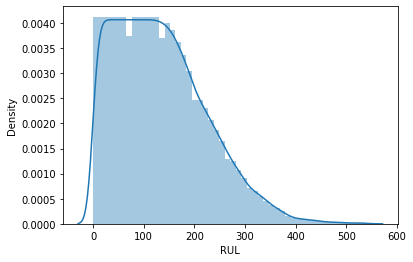

In [ ]:
sns.distplot(train['RUL'],kde=True)

In [ ]:
train["count_units"] = train["unit_nr"].map(rcrdCnts_per_engineUnit_train['unit_nr'])
train

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,RUL,count_units
0,1,1,42.0049,0.8400,100,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,1.01,41.69,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,320,321
1,1,2,20.0020,0.7002,100,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,1.07,43.94,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,319,321
2,1,3,42.0038,0.8409,100,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,1.01,41.66,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,318,321
3,1,4,42.0000,0.8400,100,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,1.02,41.68,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,317,321
4,1,5,25.0063,0.6207,60,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,0.93,36.48,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,316,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100,489.05,605.33,1516.36,1315.28,10.52,15.46,404.59,2319.66,8840.16,1.27,46.08,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,4,255
61245,249,252,0.0028,0.0015,100,518.67,643.42,1598.92,1426.77,14.62,21.57,567.59,2388.47,9117.12,1.31,48.04,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,3,255
61246,249,253,0.0029,0.0000,100,518.67,643.68,1607.72,1430.56,14.62,21.57,569.04,2388.51,9126.53,1.31,48.24,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,2,255
61247,249,254,35.0046,0.8400,100,449.44,555.77,1381.29,1148.18,5.48,7.96,199.93,2223.78,8403.64,1.05,42.53,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,1,255


In [ ]:
test["count_units"] = test["unit_nr"].map(rcrdCnts_per_engineUnit_test['unit_nr'])
test

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,count_units
0,0,1,38.4734,0.5713,100,472.8824,549.0672,1515.4699,1170.7242,12.9053,12.4615,283.3286,2228.6860,8396.0729,1.0964,41.9139,266.7357,2362.8872,8067.8118,9.4777,0.0239,348,2246,98.5813,14.6900,12.5190,85
1,0,2,31.8898,0.3428,100,480.6683,558.7492,1386.6294,1201.9154,6.8373,9.9322,433.3918,2302.2723,8251.2264,1.1596,43.5590,247.2863,2262.5543,8067.8118,9.3246,0.0208,348,2234,99.0192,15.7099,11.4781,85
2,0,3,34.6499,0.5713,100,493.0275,567.7337,1398.5125,1182.3209,10.2091,12.9014,283.3286,2228.6860,8735.4427,1.0964,42.7221,375.4411,2334.4276,8067.8118,9.7454,0.0233,353,2222,94.7672,13.3141,7.1755,85
3,0,4,30.0495,0.5713,100,471.7574,579.4201,1440.5407,1188.1000,6.0063,11.5895,251.6736,2185.7108,8261.1138,1.0841,44.5066,273.6169,2352.6543,8067.8118,9.5954,0.0206,341,2336,102.9926,21.6907,9.6127,85
4,0,5,31.8812,0.4365,100,473.7411,574.1691,1377.9721,1286.4247,5.7570,9.3094,395.8006,2228.6860,8634.5535,0.9887,40.8614,283.7432,2367.4422,8067.8118,8.9220,0.0254,340,2229,97.6193,23.2685,11.4009,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54948,350,504,19.4348,0.4936,100,487.8005,558.5404,1400.1744,1192.1876,9.2901,11.5895,449.1933,2302.3213,8472.8856,1.0165,43.6049,246.1137,2298.3819,8072.3011,9.0078,0.0196,350,2285,97.9051,17.7050,12.1891,508
54949,350,505,33.1175,0.5713,100,493.8766,605.2711,1396.0510,1201.9154,8.0316,12.9847,182.1902,2212.1692,8645.4645,1.1549,45.0590,311.9292,2408.5983,8084.9752,8.9486,0.0190,359,2229,93.6858,20.8643,16.2892,508
54950,350,506,16.9021,0.5713,100,472.1954,567.1811,1457.6802,1202.8633,8.0094,11.2897,292.5704,2268.6264,8778.3814,1.0909,43.6801,322.2521,2334.4276,8139.0516,9.7433,0.0244,351,2279,98.8087,25.0447,13.4189,508
54951,350,507,13.8923,0.6832,100,485.5690,585.5254,1402.5927,1145.9289,12.3842,11.5895,253.6366,2278.8798,8524.6733,1.0614,44.2701,199.1287,2281.6833,8083.7053,9.5250,0.0261,361,2251,97.3456,17.4663,14.3190,508


In [ ]:
Z = train['RUL']
train_new = train
data_new = train_new.drop('RUL',axis=1).append(test)
data_new

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,count_units
0,1,1,42.0049,0.8400,100,445.0000,549.6800,1343.4300,1112.9300,3.9100,5.7000,137.3600,2211.8600,8311.3200,1.0100,41.6900,129.7800,2387.9900,8074.8300,9.3335,0.0200,330,2212,100.0000,10.6200,6.3670,321
1,1,2,20.0020,0.7002,100,491.1900,606.0700,1477.6100,1237.5000,9.3500,13.6100,332.1000,2323.6600,8713.6000,1.0700,43.9400,312.5900,2387.7300,8046.1300,9.1913,0.0200,361,2324,100.0000,24.3700,14.6552,321
2,1,3,42.0038,0.8409,100,445.0000,548.9500,1343.1200,1117.0500,3.9100,5.6900,138.1800,2211.9200,8306.6900,1.0100,41.6600,129.6200,2387.9700,8066.6200,9.4007,0.0200,329,2212,100.0000,10.4800,6.4213,321
3,1,4,42.0000,0.8400,100,445.0000,548.7000,1341.2400,1118.0300,3.9100,5.7000,137.9800,2211.8800,8312.3500,1.0200,41.6800,129.8000,2388.0200,8076.0500,9.3369,0.0200,328,2212,100.0000,10.5400,6.4176,321
4,1,5,25.0063,0.6207,60,462.5400,536.1000,1255.2300,1033.5900,7.0500,9.0000,174.8200,1915.2200,7994.9400,0.9300,36.4800,164.1100,2028.0800,7865.8000,10.8366,0.0200,305,1915,84.9300,14.0300,8.6754,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54948,350,504,19.4348,0.4936,100,487.8005,558.5404,1400.1744,1192.1876,9.2901,11.5895,449.1933,2302.3213,8472.8856,1.0165,43.6049,246.1137,2298.3819,8072.3011,9.0078,0.0196,350,2285,97.9051,17.7050,12.1891,508
54949,350,505,33.1175,0.5713,100,493.8766,605.2711,1396.0510,1201.9154,8.0316,12.9847,182.1902,2212.1692,8645.4645,1.1549,45.0590,311.9292,2408.5983,8084.9752,8.9486,0.0190,359,2229,93.6858,20.8643,16.2892,508
54950,350,506,16.9021,0.5713,100,472.1954,567.1811,1457.6802,1202.8633,8.0094,11.2897,292.5704,2268.6264,8778.3814,1.0909,43.6801,322.2521,2334.4276,8139.0516,9.7433,0.0244,351,2279,98.8087,25.0447,13.4189,508
54951,350,507,13.8923,0.6832,100,485.5690,585.5254,1402.5927,1145.9289,12.3842,11.5895,253.6366,2278.8798,8524.6733,1.0614,44.2701,199.1287,2281.6833,8083.7053,9.5250,0.0261,361,2251,97.3456,17.4663,14.3190,508


In [ ]:
features = data_new.loc[:,data_new.columns != 'unit_nr']
features = data_new.loc[:,data_new.columns != 'count_units']
features

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow
0,1,1,42.0049,0.8400,100,445.0000,549.6800,1343.4300,1112.9300,3.9100,5.7000,137.3600,2211.8600,8311.3200,1.0100,41.6900,129.7800,2387.9900,8074.8300,9.3335,0.0200,330,2212,100.0000,10.6200,6.3670
1,1,2,20.0020,0.7002,100,491.1900,606.0700,1477.6100,1237.5000,9.3500,13.6100,332.1000,2323.6600,8713.6000,1.0700,43.9400,312.5900,2387.7300,8046.1300,9.1913,0.0200,361,2324,100.0000,24.3700,14.6552
2,1,3,42.0038,0.8409,100,445.0000,548.9500,1343.1200,1117.0500,3.9100,5.6900,138.1800,2211.9200,8306.6900,1.0100,41.6600,129.6200,2387.9700,8066.6200,9.4007,0.0200,329,2212,100.0000,10.4800,6.4213
3,1,4,42.0000,0.8400,100,445.0000,548.7000,1341.2400,1118.0300,3.9100,5.7000,137.9800,2211.8800,8312.3500,1.0200,41.6800,129.8000,2388.0200,8076.0500,9.3369,0.0200,328,2212,100.0000,10.5400,6.4176
4,1,5,25.0063,0.6207,60,462.5400,536.1000,1255.2300,1033.5900,7.0500,9.0000,174.8200,1915.2200,7994.9400,0.9300,36.4800,164.1100,2028.0800,7865.8000,10.8366,0.0200,305,1915,84.9300,14.0300,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54948,350,504,19.4348,0.4936,100,487.8005,558.5404,1400.1744,1192.1876,9.2901,11.5895,449.1933,2302.3213,8472.8856,1.0165,43.6049,246.1137,2298.3819,8072.3011,9.0078,0.0196,350,2285,97.9051,17.7050,12.1891
54949,350,505,33.1175,0.5713,100,493.8766,605.2711,1396.0510,1201.9154,8.0316,12.9847,182.1902,2212.1692,8645.4645,1.1549,45.0590,311.9292,2408.5983,8084.9752,8.9486,0.0190,359,2229,93.6858,20.8643,16.2892
54950,350,506,16.9021,0.5713,100,472.1954,567.1811,1457.6802,1202.8633,8.0094,11.2897,292.5704,2268.6264,8778.3814,1.0909,43.6801,322.2521,2334.4276,8139.0516,9.7433,0.0244,351,2279,98.8087,25.0447,13.4189
54951,350,507,13.8923,0.6832,100,485.5690,585.5254,1402.5927,1145.9289,12.3842,11.5895,253.6366,2278.8798,8524.6733,1.0614,44.2701,199.1287,2281.6833,8083.7053,9.5250,0.0261,361,2251,97.3456,17.4663,14.3190


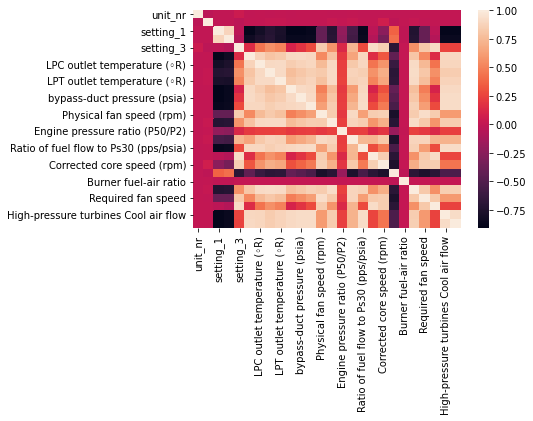

In [ ]:
corr_features = features.corr()
sns.heatmap(corr_features)

In [ ]:
corr_features

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow
unit_nr,1.000000,-0.022015,0.000377,-0.003827,0.048573,-0.001656,0.004995,-0.004687,0.003770,0.000387,0.002068,0.005073,0.001417,-0.002131,-0.000303,0.004200,-0.000647,-0.000477,-0.003977,-0.002666,0.000444,-0.004276,0.004727,0.001742,0.004040,0.001694
time_cycles,-0.022015,1.000000,-0.004757,0.000329,-0.028538,0.005622,0.003773,0.020019,0.022285,0.002951,0.001526,0.002973,0.004236,0.027396,0.008100,0.027363,0.007078,0.003813,0.071035,-0.021059,0.001253,0.020584,0.000318,0.001609,0.003634,0.003441
setting_1,0.000377,-0.004757,1.000000,0.884870,-0.024368,-0.894123,-0.808129,-0.727556,-0.777655,-0.909223,-0.902870,-0.878282,-0.416516,-0.717230,-0.213491,-0.557814,-0.878619,-0.024985,-0.244161,0.368488,-0.011106,-0.733523,-0.408549,-0.025962,-0.889289,-0.890183
setting_2,-0.003827,0.000329,0.884870,1.000000,-0.063497,-0.829499,-0.762632,-0.709267,-0.783817,-0.868410,-0.867779,-0.857432,-0.416780,-0.703639,-0.231238,-0.580840,-0.857538,-0.061339,-0.332694,0.420707,-0.012349,-0.716679,-0.409533,-0.060515,-0.861467,-0.861717
setting_3,0.048573,-0.028538,-0.024368,-0.063497,1.000000,0.146184,0.444820,0.562862,0.504528,0.102700,0.180912,0.282681,0.837869,0.579027,0.132546,0.734254,0.281494,0.918514,0.853290,-0.693855,0.008363,0.565693,0.826508,0.912938,0.255617,0.254209
Fan inlet temperature (◦R),-0.001656,0.005622,-0.894123,-0.829499,0.146184,1.000000,0.878258,0.803348,0.829889,0.907454,0.910623,0.897030,0.535186,0.794586,0.213668,0.649645,0.897608,0.152051,0.325873,-0.432832,0.011607,0.809924,0.525221,0.149557,0.901739,0.903306
LPC outlet temperature (◦R),0.004995,0.003773,-0.808129,-0.762632,0.444820,0.878258,1.000000,0.909202,0.910572,0.846510,0.876413,0.897113,0.760423,0.905568,0.235467,0.827315,0.897763,0.445110,0.578602,-0.620271,0.013288,0.914995,0.748034,0.440251,0.893537,0.893488
HPC outlet temperature (◦R),-0.004687,0.020019,-0.727556,-0.709267,0.562862,0.803348,0.909202,1.000000,0.911532,0.773685,0.814527,0.853781,0.834610,0.917717,0.240291,0.880665,0.853868,0.573735,0.694425,-0.692744,0.013709,0.922745,0.819209,0.566722,0.843329,0.845095
LPT outlet temperature (◦R),0.003770,0.022285,-0.777655,-0.783817,0.504528,0.829889,0.910572,0.911532,1.000000,0.812315,0.847990,0.881577,0.787875,0.910802,0.249219,0.861775,0.882278,0.503436,0.662754,-0.672154,0.013892,0.916842,0.775110,0.498648,0.873974,0.873326
Fan inlet Pressure (psia),0.000387,0.002951,-0.909223,-0.868410,0.102700,0.907454,0.846510,0.773685,0.812315,1.000000,0.914764,0.897961,0.487947,0.763808,0.216446,0.616393,0.899155,0.104395,0.304484,-0.416323,0.011576,0.779209,0.479693,0.102795,0.905085,0.905401


In [ ]:
features = (features - features.min()) / (features.max() - features.min())
features

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow
0,0.002857,0.000000,0.756084,0.782341,1.0,0.179363,0.281085,0.392770,0.310748,0.178476,0.207421,0.206573,0.540746,0.370016,0.463562,0.476933,0.225744,0.646936,0.547116,0.474457,0.513517,0.342857,0.491830,0.711138,0.169906,0.224973
1,0.002857,0.001845,0.360034,0.652137,1.0,0.668671,0.636322,0.672911,0.572644,0.493715,0.531798,0.563043,0.742298,0.656219,0.471229,0.597785,0.572907,0.646472,0.478562,0.458914,0.513517,0.638095,0.674837,0.711138,0.523556,0.541697
2,0.002857,0.003690,0.756064,0.783180,1.0,0.179363,0.276486,0.392123,0.319410,0.178476,0.207011,0.208074,0.540854,0.366721,0.463562,0.475322,0.225440,0.646901,0.527505,0.481802,0.513517,0.333333,0.491830,0.711138,0.166305,0.227048
3,0.002857,0.005535,0.755995,0.782341,1.0,0.179363,0.274911,0.388198,0.321470,0.178476,0.207421,0.207708,0.540782,0.370748,0.464840,0.476396,0.225782,0.646990,0.550030,0.474828,0.513517,0.323810,0.491830,0.711138,0.167848,0.226906
4,0.002857,0.007380,0.450111,0.578094,0.0,0.365171,0.195536,0.208626,0.143943,0.360434,0.342749,0.275143,0.005967,0.144926,0.453340,0.197095,0.290938,0.004753,0.047820,0.638744,0.513517,0.104762,0.006536,0.124145,0.257611,0.313186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54948,1.000000,0.928044,0.349824,0.459719,1.0,0.632765,0.336902,0.511241,0.477379,0.490244,0.448940,0.777382,0.703829,0.484962,0.464393,0.579786,0.446666,0.487050,0.541075,0.438858,0.513461,0.533333,0.611111,0.629540,0.352132,0.447458
54949,1.000000,0.929889,0.596111,0.532085,1.0,0.697131,0.631289,0.502632,0.497831,0.417316,0.506155,0.288634,0.541304,0.607744,0.482078,0.657888,0.571652,0.683708,0.571349,0.432388,0.513378,0.619048,0.519608,0.465193,0.433389,0.604139
54950,1.000000,0.931734,0.304236,0.532085,1.0,0.467454,0.391336,0.631301,0.499824,0.416030,0.436646,0.490685,0.643084,0.702308,0.473900,0.583825,0.591255,0.551366,0.700518,0.519248,0.514127,0.542857,0.601307,0.664736,0.540909,0.494453
54951,1.000000,0.933579,0.250060,0.636304,1.0,0.609126,0.506898,0.516290,0.380125,0.669543,0.448940,0.419417,0.661569,0.521806,0.470130,0.615515,0.357440,0.457254,0.568316,0.495388,0.514363,0.638095,0.555556,0.607747,0.345993,0.528850


In [ ]:
len(features[len(train_new) :])

54953

In [ ]:
y = Z
X = features[: len(train_new)]
X_test = features[len(train_new) :]

X['target'] = y

train_new = X.sample(frac=.9, random_state=42)
val = X.drop(train_new.index)

X_train = train_new.iloc[:, :-1]
y_train = train_new.iloc[:,-1]

X_val = val.iloc[:, :-1]
y_val = val.iloc[:,-1]

<ipython-input-35-3a087525756c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['target'] = y


In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((55124, 26), (55124,), (6125, 26), (6125,), (54953, 26))

In [ ]:
from sklearn.linear_model import SGDRegressor,Ridge,LinearRegression

model = SGDRegressor(random_state=42).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.5858438537311668


In [ ]:
modelRidge =  Ridge(max_iter=15000,random_state=42).fit(X_train, y_train)
print(modelRidge.score(X_train, y_train))

0.6106965681587794


In [ ]:
from sklearn.neural_network import MLPRegressor
modelMLP = MLPRegressor(max_iter=1000,random_state=42).fit(X_train, y_train)
print(modelMLP.score(X_train, y_train))

0.6462241433136275


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

modelET = ExtraTreesRegressor(n_estimators=1000,random_state=42).fit(X_train, y_train)
print(modelET.score(X_train, y_train))

0.9999999999999954


In [ ]:
modelLR = LinearRegression().fit(X_train, y_train)
print(modelLR.score(X_train, y_train))

0.6143391754006735


In [ ]:
y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val))

0.5846388950599795


In [ ]:
y_pred_ridge = modelRidge.predict(X_val)
y_pred_ridge = y_pred_ridge.astype(int)
print(modelRidge.score(X_val, y_val))

0.6087560796966893


In [ ]:
y_pred_MLP = modelMLP.predict(X_val)
y_pred_MLP = y_pred_MLP.astype(int)
print(modelMLP.score(X_val, y_val))

0.6469499901932234


In [ ]:
y_pred_ET = modelET.predict(X_val)
y_pred_ET = y_pred_ET.astype(int)
print(modelET.score(X_val, y_val))

0.7677558797658771


In [ ]:
y_pred_LR = modelLR.predict(X_val)
y_pred_LR = y_pred_LR.astype(int)
print(modelLR.score(X_val, y_val))

0.612418407778619


In [ ]:
def calc_rmse(y_true, y_pred):
  MSE = np.square(np.subtract(y_true, y_pred)).mean() 
  RMSE = np.sqrt(MSE)
  return RMSE

print("RMSE sgd: ", calc_rmse(y_val, y_pred))



RMSE sgd:  58.38594463235347


In [ ]:
print("RMSE Ridge: ", calc_rmse(y_val, y_pred_ridge))

RMSE Ridge:  56.64581545148119


In [ ]:
print("RMSE MLP: ", calc_rmse(y_val, y_pred_MLP))

RMSE MLP:  53.793534244652605


In [ ]:
print("RMSE ET: ", calc_rmse(y_val, y_pred_ET))

RMSE ET:  43.64937103598098


In [ ]:
print("RMSE LR: ", calc_rmse(y_val, y_pred_LR))

RMSE LR:  56.37560334986424


In [ ]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
9,311,227
55,265,204
60,260,223
77,243,205
82,238,183
...,...,...
61186,62,114
61215,33,87
61222,26,59
61223,25,58


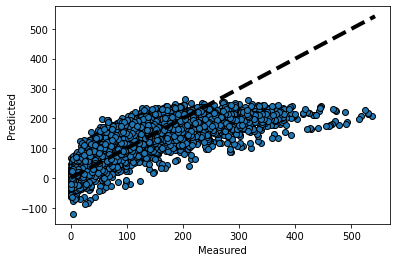

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred_ridge})
df

,Actual,Predicted
9,311,236
55,265,216
60,260,231
77,243,220
82,238,195
...,...,...
61186,62,124
61215,33,97
61222,26,58
61223,25,59


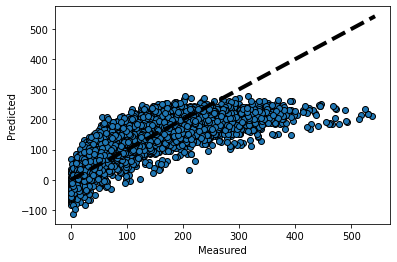

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred_ridge, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred_MLP})
df

,Actual,Predicted
9,311,276
55,265,236
60,260,244
77,243,233
82,238,201
...,...,...
61186,62,120
61215,33,96
61222,26,69
61223,25,68


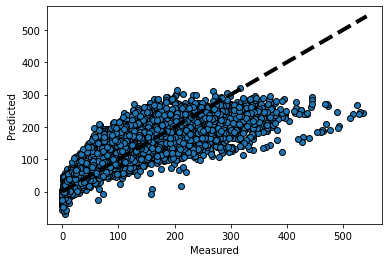

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred_MLP, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred_ET})
df

,Actual,Predicted
9,311,300
55,265,261
60,260,247
77,243,214
82,238,234
...,...,...
61186,62,91
61215,33,42
61222,26,38
61223,25,35


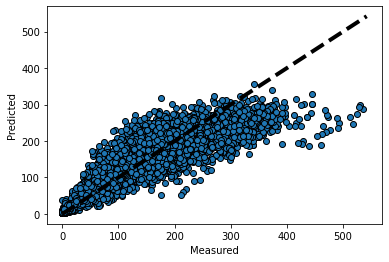

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred_ET, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred_LR})
df

,Actual,Predicted
9,311,240
55,265,228
60,260,231
77,243,215
82,238,202
...,...,...
61186,62,128
61215,33,98
61222,26,50
61223,25,56


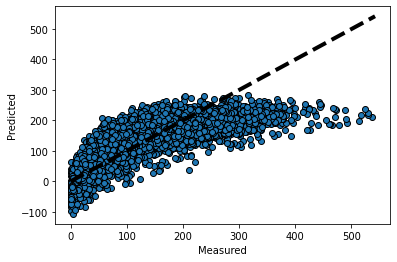

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred_LR, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
prediction = model.predict(X_test)
prediction = prediction.astype(int)
for element in range(len(prediction)):
    if prediction[element] > 542:
        prediction[element] = 542
    if prediction[element] < 0:
        prediction[element] = 0
prediction

array([167, 350, 315, ...,   0,  19,  82])

In [ ]:
predictionRidge = modelRidge.predict(X_test)
predictionRidge = predictionRidge.astype(int)
for element in range(len(predictionRidge)):
    if predictionRidge[element] > test['count_units'].iloc[element]:
        predictionRidge[element] = test['count_units'].iloc[element]
    if predictionRidge[element] < 0:
        predictionRidge[element] = 0

predictionRidge

array([85, 85, 85, ...,  0, 26, 25])

In [ ]:
predictionMLP = modelMLP.predict(X_test)
predictionMLP = predictionMLP.astype(int)
for element in range(len(predictionMLP)):
    if predictionMLP[element] > 542:
        predictionMLP[element] = 542
    if predictionMLP[element] < 0:
        predictionMLP[element] = 0
predictionMLP

array([299, 506, 448, ...,   0,  70, 199])

In [ ]:
predictionET = modelET.predict(X_test)
predictionET = predictionET.astype(int)
for element in range(len(predictionET)):
    if predictionET[element] > 542:
        predictionET[element] = 542
    if predictionET[element] < 0:
        predictionET[element] = 0
predictionET

array([266, 275, 269, ...,  66,  64,  61])

In [ ]:
predictionLR = modelLR.predict(X_test)
predictionLR = predictionLR.astype(int)
for element in range(len(predictionLR)):
    if predictionLR[element] > 542:
        predictionLR[element] = 542
    if predictionLR[element] < 0:
        predictionLR[element] = 0
predictionLR

array([542, 542, 542, ...,   0, 542,   0])

In [ ]:
test_prediction = pd.DataFrame()
test_prediction['unit_nr'] = test['unit_nr']
test_prediction['RUL'] = prediction
test_prediction

,unit_nr,RUL
0,0,167
1,0,350
2,0,315
3,0,213
4,0,337
...,...,...
54948,350,128
54949,350,71
54950,350,0
54951,350,19


In [ ]:
test_predictionRidge = pd.DataFrame()
test_predictionRidge['unit_nr'] = test['unit_nr']
test_predictionRidge['RUL'] = predictionRidge
test_predictionRidge

,unit_nr,RUL
0,0,85
1,0,85
2,0,85
3,0,85
4,0,85
...,...,...
54948,350,259
54949,350,114
54950,350,0
54951,350,26


In [ ]:
test_predictionRidge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54953 entries, 0 to 54952
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   unit_nr  54953 non-null  int64
 1   RUL      54953 non-null  int64
dtypes: int64(2)
memory usage: 858.8 KB


In [ ]:
test_predictionMLP = pd.DataFrame()
test_predictionMLP['unit_nr'] = test['unit_nr']
test_predictionMLP['RUL'] = predictionMLP
test_predictionMLP

,unit_nr,RUL
0,0,299
1,0,506
2,0,448
3,0,290
4,0,475
...,...,...
54948,350,276
54949,350,238
54950,350,0
54951,350,70


In [ ]:
test_predictionET = pd.DataFrame()
test_predictionET['unit_nr'] = test['unit_nr']
test_predictionET['RUL'] = predictionET
test_predictionET

,unit_nr,RUL
0,0,266
1,0,275
2,0,269
3,0,263
4,0,294
...,...,...
54948,350,80
54949,350,47
54950,350,66
54951,350,64


In [ ]:
test_predictionLR = pd.DataFrame()
test_predictionLR['unit_nr'] = test['unit_nr']
test_predictionLR['RUL'] = predictionLR
test_predictionLR

,unit_nr,RUL
0,0,542
1,0,542
2,0,542
3,0,0
4,0,542
...,...,...
54948,350,542
54949,350,542
54950,350,0
54951,350,542


In [ ]:
failure_prediction = []

for row in range(len(test_prediction)):
    if test_prediction['RUL'].iloc[row] < 22:
        failure = 1
    else:
        failure = 0
    failure_prediction.append(failure)

In [ ]:
failure_predictionRidge = []

for row in range(len(test_predictionRidge)):
    foo = test['count_units'].iloc[row] - 21
    if test_predictionRidge['RUL'].iloc[row] < foo:
        failure = 1
    else:
        failure = 0
    failure_predictionRidge.append(failure)

In [ ]:
failure_predictionMLP = []

for row in range(len(test_predictionMLP)):
    if test_predictionMLP['RUL'].iloc[row] < 22:
        failure = 1
    else:
        failure = 0
    failure_predictionMLP.append(failure)

In [ ]:
failure_predictionET = []

for row in range(len(test_predictionET)):
    if test_predictionET['RUL'].iloc[row] < 22:
        failure = 1
    else:
        failure = 0
    failure_predictionET.append(failure)

In [ ]:
failure_predictionLR = []

for row in range(len(test_predictionLR)):
    if test_predictionLR['RUL'].iloc[row] <= 21:
        failure = 1
    else:
        failure = 0
    failure_predictionLR.append(failure)

In [ ]:
test['failure_prediction'] = failure_prediction

In [ ]:
test['failure_predictionRidge'] = failure_predictionRidge
test

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,count_units,failure_prediction,failure_predictionRidge
0,0,1,38.4734,0.5713,100,472.8824,549.0672,1515.4699,1170.7242,12.9053,12.4615,283.3286,2228.6860,8396.0729,1.0964,41.9139,266.7357,2362.8872,8067.8118,9.4777,0.0239,348,2246,98.5813,14.6900,12.5190,85,0,0
1,0,2,31.8898,0.3428,100,480.6683,558.7492,1386.6294,1201.9154,6.8373,9.9322,433.3918,2302.2723,8251.2264,1.1596,43.5590,247.2863,2262.5543,8067.8118,9.3246,0.0208,348,2234,99.0192,15.7099,11.4781,85,0,0
2,0,3,34.6499,0.5713,100,493.0275,567.7337,1398.5125,1182.3209,10.2091,12.9014,283.3286,2228.6860,8735.4427,1.0964,42.7221,375.4411,2334.4276,8067.8118,9.7454,0.0233,353,2222,94.7672,13.3141,7.1755,85,0,0
3,0,4,30.0495,0.5713,100,471.7574,579.4201,1440.5407,1188.1000,6.0063,11.5895,251.6736,2185.7108,8261.1138,1.0841,44.5066,273.6169,2352.6543,8067.8118,9.5954,0.0206,341,2336,102.9926,21.6907,9.6127,85,0,0
4,0,5,31.8812,0.4365,100,473.7411,574.1691,1377.9721,1286.4247,5.7570,9.3094,395.8006,2228.6860,8634.5535,0.9887,40.8614,283.7432,2367.4422,8067.8118,8.9220,0.0254,340,2229,97.6193,23.2685,11.4009,85,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54948,350,504,19.4348,0.4936,100,487.8005,558.5404,1400.1744,1192.1876,9.2901,11.5895,449.1933,2302.3213,8472.8856,1.0165,43.6049,246.1137,2298.3819,8072.3011,9.0078,0.0196,350,2285,97.9051,17.7050,12.1891,508,0,1
54949,350,505,33.1175,0.5713,100,493.8766,605.2711,1396.0510,1201.9154,8.0316,12.9847,182.1902,2212.1692,8645.4645,1.1549,45.0590,311.9292,2408.5983,8084.9752,8.9486,0.0190,359,2229,93.6858,20.8643,16.2892,508,0,1
54950,350,506,16.9021,0.5713,100,472.1954,567.1811,1457.6802,1202.8633,8.0094,11.2897,292.5704,2268.6264,8778.3814,1.0909,43.6801,322.2521,2334.4276,8139.0516,9.7433,0.0244,351,2279,98.8087,25.0447,13.4189,508,1,1
54951,350,507,13.8923,0.6832,100,485.5690,585.5254,1402.5927,1145.9289,12.3842,11.5895,253.6366,2278.8798,8524.6733,1.0614,44.2701,199.1287,2281.6833,8083.7053,9.5250,0.0261,361,2251,97.3456,17.4663,14.3190,508,1,1


In [ ]:
test['failure_predictionRidge'].value_counts()

1    29018
0    25935
Name: failure_predictionRidge, dtype: int64

In [ ]:
len(failure_predictionRidge)

54953

In [ ]:
test['failure_predictionMLP'] = failure_predictionMLP
test

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,count_units,failure_prediction,failure_predictionRidge,failure_predictionMLP
0,0,1,38.4734,0.5713,100,472.8824,549.0672,1515.4699,1170.7242,12.9053,12.4615,283.3286,2228.6860,8396.0729,1.0964,41.9139,266.7357,2362.8872,8067.8118,9.4777,0.0239,348,2246,98.5813,14.6900,12.5190,85,0,0,0
1,0,2,31.8898,0.3428,100,480.6683,558.7492,1386.6294,1201.9154,6.8373,9.9322,433.3918,2302.2723,8251.2264,1.1596,43.5590,247.2863,2262.5543,8067.8118,9.3246,0.0208,348,2234,99.0192,15.7099,11.4781,85,0,0,0
2,0,3,34.6499,0.5713,100,493.0275,567.7337,1398.5125,1182.3209,10.2091,12.9014,283.3286,2228.6860,8735.4427,1.0964,42.7221,375.4411,2334.4276,8067.8118,9.7454,0.0233,353,2222,94.7672,13.3141,7.1755,85,0,0,0
3,0,4,30.0495,0.5713,100,471.7574,579.4201,1440.5407,1188.1000,6.0063,11.5895,251.6736,2185.7108,8261.1138,1.0841,44.5066,273.6169,2352.6543,8067.8118,9.5954,0.0206,341,2336,102.9926,21.6907,9.6127,85,0,0,0
4,0,5,31.8812,0.4365,100,473.7411,574.1691,1377.9721,1286.4247,5.7570,9.3094,395.8006,2228.6860,8634.5535,0.9887,40.8614,283.7432,2367.4422,8067.8118,8.9220,0.0254,340,2229,97.6193,23.2685,11.4009,85,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54948,350,504,19.4348,0.4936,100,487.8005,558.5404,1400.1744,1192.1876,9.2901,11.5895,449.1933,2302.3213,8472.8856,1.0165,43.6049,246.1137,2298.3819,8072.3011,9.0078,0.0196,350,2285,97.9051,17.7050,12.1891,508,0,1,0
54949,350,505,33.1175,0.5713,100,493.8766,605.2711,1396.0510,1201.9154,8.0316,12.9847,182.1902,2212.1692,8645.4645,1.1549,45.0590,311.9292,2408.5983,8084.9752,8.9486,0.0190,359,2229,93.6858,20.8643,16.2892,508,0,1,0
54950,350,506,16.9021,0.5713,100,472.1954,567.1811,1457.6802,1202.8633,8.0094,11.2897,292.5704,2268.6264,8778.3814,1.0909,43.6801,322.2521,2334.4276,8139.0516,9.7433,0.0244,351,2279,98.8087,25.0447,13.4189,508,1,1,1
54951,350,507,13.8923,0.6832,100,485.5690,585.5254,1402.5927,1145.9289,12.3842,11.5895,253.6366,2278.8798,8524.6733,1.0614,44.2701,199.1287,2281.6833,8083.7053,9.5250,0.0261,361,2251,97.3456,17.4663,14.3190,508,1,1,0


In [ ]:
test['failure_predictionET'] = failure_predictionET
test

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,count_units,failure_prediction,failure_predictionRidge,failure_predictionMLP,failure_predictionET
0,0,1,38.4734,0.5713,100,472.8824,549.0672,1515.4699,1170.7242,12.9053,12.4615,283.3286,2228.6860,8396.0729,1.0964,41.9139,266.7357,2362.8872,8067.8118,9.4777,0.0239,348,2246,98.5813,14.6900,12.5190,85,0,0,0,0
1,0,2,31.8898,0.3428,100,480.6683,558.7492,1386.6294,1201.9154,6.8373,9.9322,433.3918,2302.2723,8251.2264,1.1596,43.5590,247.2863,2262.5543,8067.8118,9.3246,0.0208,348,2234,99.0192,15.7099,11.4781,85,0,0,0,0
2,0,3,34.6499,0.5713,100,493.0275,567.7337,1398.5125,1182.3209,10.2091,12.9014,283.3286,2228.6860,8735.4427,1.0964,42.7221,375.4411,2334.4276,8067.8118,9.7454,0.0233,353,2222,94.7672,13.3141,7.1755,85,0,0,0,0
3,0,4,30.0495,0.5713,100,471.7574,579.4201,1440.5407,1188.1000,6.0063,11.5895,251.6736,2185.7108,8261.1138,1.0841,44.5066,273.6169,2352.6543,8067.8118,9.5954,0.0206,341,2336,102.9926,21.6907,9.6127,85,0,0,0,0
4,0,5,31.8812,0.4365,100,473.7411,574.1691,1377.9721,1286.4247,5.7570,9.3094,395.8006,2228.6860,8634.5535,0.9887,40.8614,283.7432,2367.4422,8067.8118,8.9220,0.0254,340,2229,97.6193,23.2685,11.4009,85,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54948,350,504,19.4348,0.4936,100,487.8005,558.5404,1400.1744,1192.1876,9.2901,11.5895,449.1933,2302.3213,8472.8856,1.0165,43.6049,246.1137,2298.3819,8072.3011,9.0078,0.0196,350,2285,97.9051,17.7050,12.1891,508,0,1,0,0
54949,350,505,33.1175,0.5713,100,493.8766,605.2711,1396.0510,1201.9154,8.0316,12.9847,182.1902,2212.1692,8645.4645,1.1549,45.0590,311.9292,2408.5983,8084.9752,8.9486,0.0190,359,2229,93.6858,20.8643,16.2892,508,0,1,0,0
54950,350,506,16.9021,0.5713,100,472.1954,567.1811,1457.6802,1202.8633,8.0094,11.2897,292.5704,2268.6264,8778.3814,1.0909,43.6801,322.2521,2334.4276,8139.0516,9.7433,0.0244,351,2279,98.8087,25.0447,13.4189,508,1,1,1,0
54951,350,507,13.8923,0.6832,100,485.5690,585.5254,1402.5927,1145.9289,12.3842,11.5895,253.6366,2278.8798,8524.6733,1.0614,44.2701,199.1287,2281.6833,8083.7053,9.5250,0.0261,361,2251,97.3456,17.4663,14.3190,508,1,1,0,0


In [ ]:
test['failure_predictionLR'] = failure_predictionLR
test

,unit_nr,time_cycles,setting_1,setting_2,setting_3,Fan inlet temperature (◦R),LPC outlet temperature (◦R),HPC outlet temperature (◦R),LPT outlet temperature (◦R),Fan inlet Pressure (psia),bypass-duct pressure (psia),HPC outlet pressure (psia),Physical fan speed (rpm),Physical core speed (rpm),Engine pressure ratio (P50/P2),HPC outlet Static pressure (psia),Ratio of fuel flow to Ps30 (pps/psia),Corrected fan speed (rpm),Corrected core speed (rpm),Bypass Ratio,Burner fuel-air ratio,Bleed Enthalpy,Required fan speed,Required fan conversion speed,High-pressure turbines Cool air flow,Low-pressure turbines Cool air flow,count_units,failure_prediction,failure_predictionRidge,failure_predictionMLP,failure_predictionET,failure_predictionLR
0,0,1,38.4734,0.5713,100,472.8824,549.0672,1515.4699,1170.7242,12.9053,12.4615,283.3286,2228.6860,8396.0729,1.0964,41.9139,266.7357,2362.8872,8067.8118,9.4777,0.0239,348,2246,98.5813,14.6900,12.5190,85,0,0,0,0,0
1,0,2,31.8898,0.3428,100,480.6683,558.7492,1386.6294,1201.9154,6.8373,9.9322,433.3918,2302.2723,8251.2264,1.1596,43.5590,247.2863,2262.5543,8067.8118,9.3246,0.0208,348,2234,99.0192,15.7099,11.4781,85,0,0,0,0,0
2,0,3,34.6499,0.5713,100,493.0275,567.7337,1398.5125,1182.3209,10.2091,12.9014,283.3286,2228.6860,8735.4427,1.0964,42.7221,375.4411,2334.4276,8067.8118,9.7454,0.0233,353,2222,94.7672,13.3141,7.1755,85,0,0,0,0,0
3,0,4,30.0495,0.5713,100,471.7574,579.4201,1440.5407,1188.1000,6.0063,11.5895,251.6736,2185.7108,8261.1138,1.0841,44.5066,273.6169,2352.6543,8067.8118,9.5954,0.0206,341,2336,102.9926,21.6907,9.6127,85,0,0,0,0,1
4,0,5,31.8812,0.4365,100,473.7411,574.1691,1377.9721,1286.4247,5.7570,9.3094,395.8006,2228.6860,8634.5535,0.9887,40.8614,283.7432,2367.4422,8067.8118,8.9220,0.0254,340,2229,97.6193,23.2685,11.4009,85,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54948,350,504,19.4348,0.4936,100,487.8005,558.5404,1400.1744,1192.1876,9.2901,11.5895,449.1933,2302.3213,8472.8856,1.0165,43.6049,246.1137,2298.3819,8072.3011,9.0078,0.0196,350,2285,97.9051,17.7050,12.1891,508,0,1,0,0,0
54949,350,505,33.1175,0.5713,100,493.8766,605.2711,1396.0510,1201.9154,8.0316,12.9847,182.1902,2212.1692,8645.4645,1.1549,45.0590,311.9292,2408.5983,8084.9752,8.9486,0.0190,359,2229,93.6858,20.8643,16.2892,508,0,1,0,0,0
54950,350,506,16.9021,0.5713,100,472.1954,567.1811,1457.6802,1202.8633,8.0094,11.2897,292.5704,2268.6264,8778.3814,1.0909,43.6801,322.2521,2334.4276,8139.0516,9.7433,0.0244,351,2279,98.8087,25.0447,13.4189,508,1,1,1,0,1
54951,350,507,13.8923,0.6832,100,485.5690,585.5254,1402.5927,1145.9289,12.3842,11.5895,253.6366,2278.8798,8524.6733,1.0614,44.2701,199.1287,2281.6833,8083.7053,9.5250,0.0261,361,2251,97.3456,17.4663,14.3190,508,1,1,0,0,0


In [ ]:
test_pivot=test.pivot_table(index=['unit_nr'], values=['failure_prediction'], aggfunc='sum')
test_pivot['unit_nr'] = test_pivot.index
test_pivot.index.names = ['index']
test_pivot

,failure_prediction,unit_nr
index,,
0,12,0
1,34,1
2,71,2
3,0,3
4,5,4
...,...,...
346,78,346
347,3,347
348,0,348


In [ ]:
test_pivot_ridge=test.pivot_table(index=['unit_nr'], values=['failure_predictionRidge'], aggfunc='sum')
test_pivot_ridge['unit_nr'] = test_pivot_ridge.index
test_pivot_ridge.index.names = ['index']
test_pivot_ridge

,failure_predictionRidge,unit_nr
index,,
0,26,0
1,100,1
2,238,2
3,11,3
4,67,4
...,...,...
346,260,346
347,14,347
348,3,348


In [ ]:
test_pivot_MLP=test.pivot_table(index=['unit_nr'], values=['failure_predictionMLP'], aggfunc='sum')
test_pivot_MLP['unit_nr'] = test_pivot_MLP.index
test_pivot_MLP.index.names = ['index']
test_pivot_MLP

,failure_predictionMLP,unit_nr
index,,
0,17,0
1,44,1
2,91,2
3,4,3
4,26,4
...,...,...
346,85,346
347,7,347
348,1,348


In [ ]:
test_pivot_ET=test.pivot_table(index=['unit_nr'], values=['failure_predictionET'], aggfunc='sum')
test_pivot_ET['unit_nr'] = test_pivot_ET.index
test_pivot_ET.index.names = ['index']
test_pivot_ET

,failure_predictionET,unit_nr
index,,
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
346,0,346
347,0,347
348,0,348


In [ ]:
test_pivot_LR=test.pivot_table(index=['unit_nr'], values=['failure_predictionLR'], aggfunc='sum')
test_pivot_LR['unit_nr'] = test_pivot_LR.index
test_pivot_LR.index.names = ['index']
test_pivot_LR

,failure_predictionLR,unit_nr
index,,
0,27,0
1,59,1
2,88,2
3,55,3
4,59,4
...,...,...
346,90,346
347,19,347
348,24,348


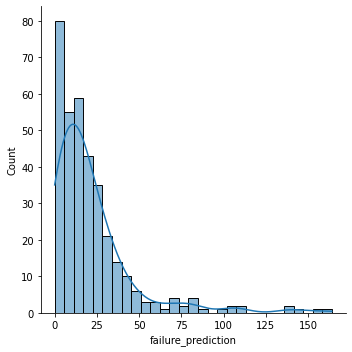

In [ ]:
sns.displot(test_pivot['failure_prediction'], kde=True)

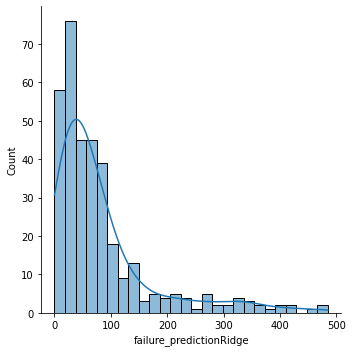

In [ ]:
sns.displot(test_pivot_ridge['failure_predictionRidge'], kde=True)

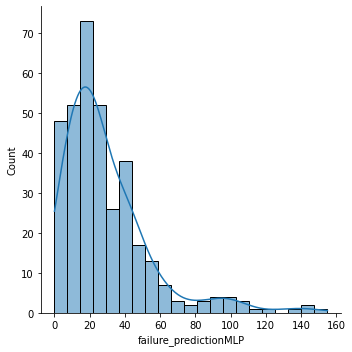

In [ ]:
sns.displot(test_pivot_MLP['failure_predictionMLP'], kde=True)

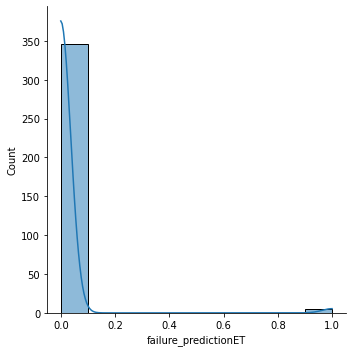

In [ ]:
sns.displot(test_pivot_ET['failure_predictionET'], kde=True)

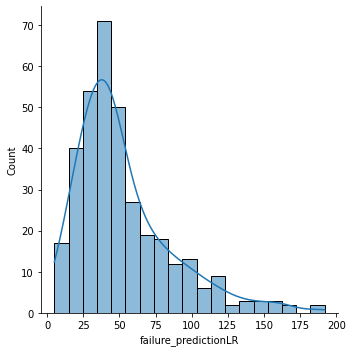

In [ ]:
sns.displot(test_pivot_LR['failure_predictionLR'], kde=True)